In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [8]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_length' , 'Sepal_Width' , 'Petal_length' , 'Petal_Width']
y= pd.DataFrame(iris.target)
y.columns = ['Targets']




C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Petal Width')

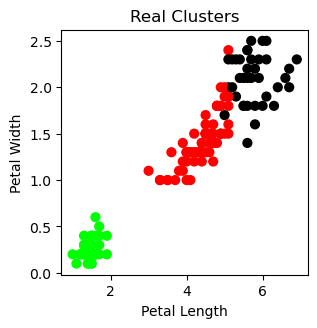

In [14]:
model = KMeans(n_clusters =3)
model.fit(X)
plt.figure(figsize=(7,7))
colormap = np.array(['red','lime' ,'black'])
plt.subplot(2,2,1)
plt.scatter(X.Petal_length , X.Petal_Width , c=colormap[model.labels_], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Width')

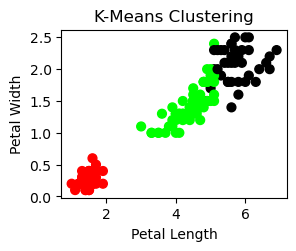

In [12]:
plt.subplot(2,2,2)
plt.scatter(X.Petal_length , X.Petal_Width , c=colormap[model.labels_] , s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [16]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa , columns = X.columns)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Observation : The GMM using EM algorithm based clustering matched the true labels than the Kmeans


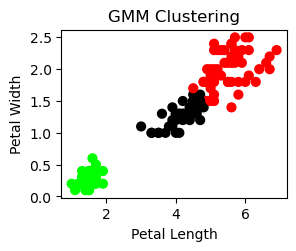

In [18]:
from sklearn.mixture import GaussianMixture
gm =GaussianMixture(n_components=3)
gm.fit(xs)
gm_y = gm.predict(xs)
plt.subplot(2,2,3)
plt.scatter(X.Petal_length , X.Petal_Width , c=colormap[gm_y] , s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('Observation : The GMM using EM algorithm based clustering matched the true labels than the Kmeans')